# Results of `KSE_modred_run_script.jl` 

This notebook is a tool for analysing the results of the latet run of the script `KSE_modred_run_script.jl`. 

In [1]:
using JLD, Dates
using Plots
using Statistics
using StatsBase

include("AnalysisToolbox.jl")


gen = 3

3

Here is a table for the gen's

| gen |  T    |  T_disc |  h  | 
|:---:|:-----:|:-------:|:---:|
|1    | 400   | 100     | 0.01|
|2    | 3000  | 1000    |0.001| 
|3*   | 16,000| 1000    |0.001|

\* For gen 3 the `obs_gap` in the runscript is 1 but since the solver kept only 1 out of each 100 computed terms the effecitive `h` is 0.001 and `obs_gap` is 100 is this should be somewhat better than have ing `obs_gap` be 1 with `h` = 0.1  

In [25]:
# Load and look at original sol

Dat_sol = load("Data\\KSE_sol$gen.jld")
# here are the run parameters

Dict{String,Any} with 17 entries:
  "T"       => 16000
  "P"       => 100.531
  "short"   => false
  "h"       => 0.001
  "gen"     => 3
  "N"       => 128
  "loadsol" => false
  "dat_uu"  => [-6.70738 -6.60561 … 5.22393 5.18052; -3.74314 -3.61286 … 7.8331…
  "loadwf"  => false
  "q"       => 0.0:0.0625:7.9375
  "d"       => 5
  "g"       => "x -> cos(π*x/16)*(1 + sin.(π*x/16))"
  "tm"      => 2020-07-20T13:43:53.702
  "M_out"   => 1024
  "obs_gap" => 100
  "dat_tt"  => [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  14999.1, 1…
  "dat_vv"  => Complex{Float64}[7.02817+0.0im 7.02817+0.0im … 7.02817+0.0im 7.0…

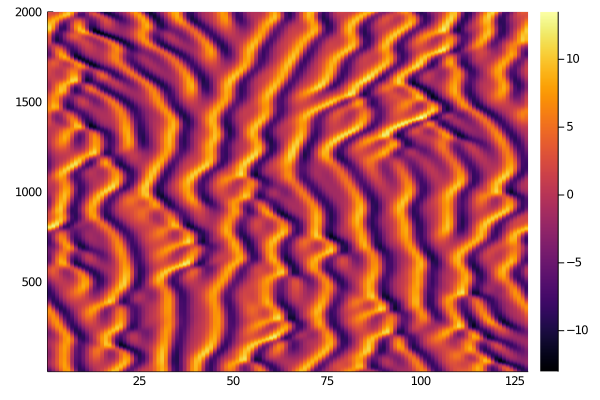

In [27]:
uu = Dat_sol["dat_uu"]
h = Dat_sol["h"]
obs_gap = 100
# times
t_start = 0
t_stop = 200
ind_start = floor(Int,t_start/h/obs_gap)+1
ind_stop =floor(Int,t_stop/h/obs_gap)
H1 = heatmap(uu[:,ind_start:ind_stop]')

In [10]:
vv = Dat_sol["dat_vv"]
C = crosscor(real(vv[2,:]),real(vv[2,:]),0:10)

11-element Array{Float64,1}:
 1.0
 0.9999673532630035
 0.9998941296501735
 0.9997803979563935
 0.9996262702806976
 0.9994319010745032
 0.9991974858398102
 0.9989232595061421
 0.9986094945212103
 0.9982564986951411
 0.9978646128415486

In [8]:
size(vv)

(128, 150001)

In [29]:
M_out = 1024

Dat_wf = load("Data\\KSE_wf$gen-M0$M_out.jld")
h_wf = Dat_wf["dat_h_wf"]

ErrorException: File Data\KSE_wf3-M01024.jld cannot be found

In [28]:
d, nu, M_out = size(h_wf)

H_wf = zeros(d*M_out,nu)
for i = 1:M_out
    H_wf[d*(i-1)+1:d*i,:] = h_wf[:,:,i]
end

H_H_wf = heatmap(log.(10,abs.(H_wf[1:d*M_out,:])),
    title = "heatmap of log abs of stacked h_wf gen$gen",
    xaxis = "coefficients to Psi",
    yaxis = "(for h_wf[i,:,k]) row = 5(k-1) + i")

UndefVarError: UndefVarError: h_wf not defined

In [41]:
savefig(H_H_wf,"H_wfgen$gen.png")

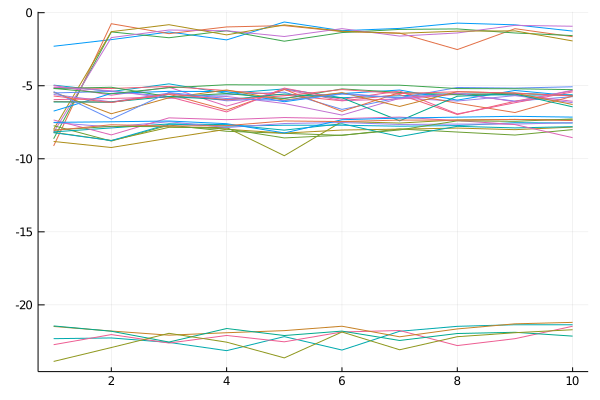

In [42]:
plot(log.(10,abs.(H_wf[5:5:50,1:35])),leg = :none)

## Run the reduced model

In [43]:
Dat_rm = load("Data\\KSE_rmrun$gen.jld")
uu_rm = Dat_rm["dat_UU_rm"]
vv_rm = Dat_rm["dat_VV_rm"]

blup = findall(isnan,uu_rm[1,:])[1]
println("Blow-up step $blup")

Blow-up step 14


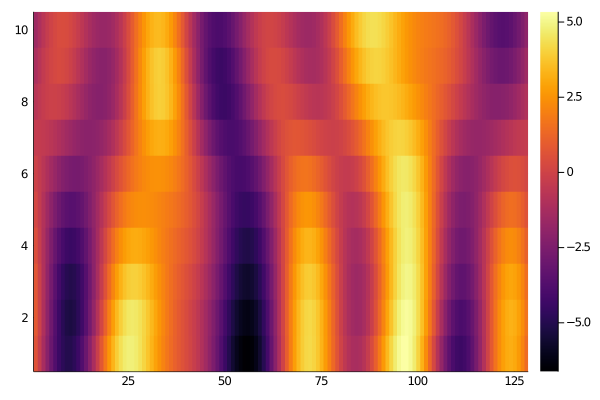

In [47]:
H1 = heatmap(uu_rm[:,1:blup-4]')

In [ ]:
plot()